<a href="https://colab.research.google.com/github/AadiSharmaa/Stock-price-predictor/blob/main/Stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import yfinance as fy
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #plotting style

# data collection

# define the stock ticker and range
ticker_symbol = 'KO'
start_date = '2015-01-01'
end_date = '2025-07-31'

stock_data = fy.download(ticker_symbol, start=start_date, end=end_date)

# taking only closed price values
data = stock_data[['Close']]

# dataframe -> numpy array
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*.8)) # 80 % data points, used to train the model

print(f"total data points:{len(dataset)}")
print(f"total training points:{training_data_len}")

/tmp/ipython-input-2143570385.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = fy.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

total data points:2659
total training points:2128


Data preprocessing

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create training dataset
train_data = scaled_data[0:int(training_data_len),:]

X_train = []
y_train = []

# using past 60 days of data to predict the 61st day
for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

# convert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# reshape the data to be 3-d for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

# we reshape X_train into a 3D array,
# which is the required input format for Keras LSTM layers.
# LSTM is an enhanced version of RNN, ideal for time series forecasting
# LSTM addresses learning long term dependencies

MODEL BUILDING & TRAINING

In [19]:
# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=32, epochs=25)

# Sequential() creates a linear stack of layers.

# LSTM(units=50, return_sequences=True): The first LSTM layer. return_sequences=True is necessary because we are stacking another LSTM layer on top of it.

# Dropout(0.2): A layer that randomly "drops" 20% of its neurons during training to prevent the model from overfitting.

# LSTM(units=50, return_sequences=False): The second LSTM layer. return_sequences is False because we will not stack more LSTM layers.

# Dense(units=1): The final output layer with one neuron, which will give us our predicted price.

# model.compile() configures the model for training.

# model.fit() trains the model using our prepared X_train and y_train data.

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0200
Epoch 2/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0019
Epoch 3/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0014
Epoch 4/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0013
Epoch 5/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0013
Epoch 6/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012
Epoch 7/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0010
Epoch 8/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0011
Epoch 9/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 9.4856e-04
Epoch 10/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 8.1741e-04
Epoch 11/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 8.0962e-04
Epoch 12/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 7.5164e-04
Epoch 13/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 7.7817e-04
Epoch 14/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 8.0520e-04
Epoch 15/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss

Evaluation and Visulaization

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Root Mean Squared Error (RMSE): 0.93


/tmp/ipython-input-321948293.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


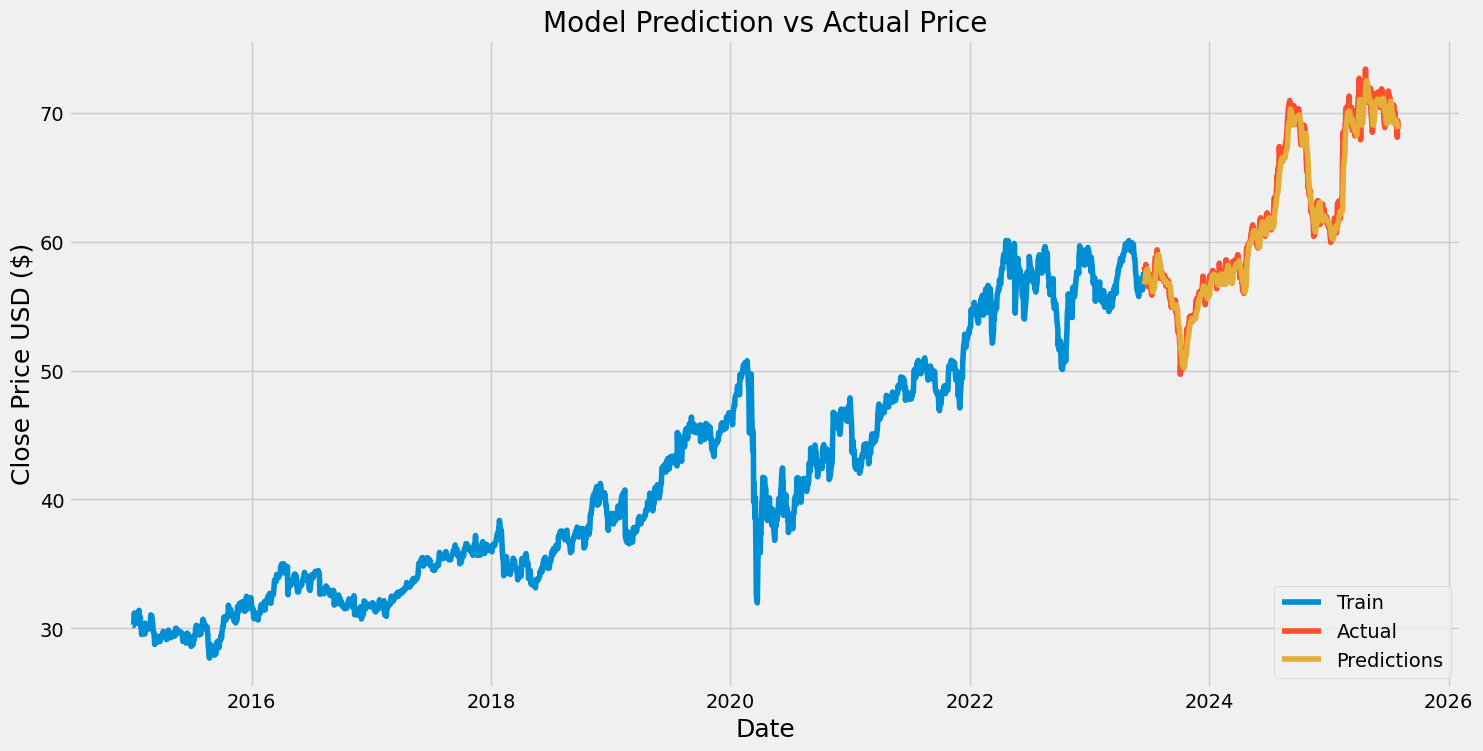

In [22]:
# create testing dataset
test_data = scaled_data[training_data_len - 60:,:]

X_test = []
y_test = dataset[training_data_len:,:] # actual values

for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i,0])

  # convert the data to a numpy array and reshape it
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

  # Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # Un-scale the values

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model Prediction vs Actual Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

PREDICTING

In [23]:
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = data[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list and append the past 60 days
X_predict = []
X_predict.append(last_60_days_scaled)

# Convert the X_predict data set to a numpy array and reshape
X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_predict)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(f"Predicted Price for next business day: ${pred_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Price for next business day: $68.62
